In [28]:
import random as rand
import pandas as pd
import re
import emoji
import html
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [3]:
rand.seed(0)

In [4]:
training_df = pd.read_csv("C:\\Users\\Thomas\\Desktop\\training_data.csv")

c:\Users\Thomas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
training_df[:10]

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us
2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us
5,So I made a meme....#corona #virus #meme #coro...,NaN,False,True,corona virus meme coronavirusmeme toilet paper...,us
6,When I first saw the revised CDC figure—which ...,NaN,False,True,Coronavirus,us
7,"Um, no one’s really listening to you. #blackli...",NaN,True,False,blacklifematters COVID19 StopPoliceBrutality,us
8,ஆக்கப்பூர்வமான யோசனையை @CMOTamilNadu அரசுக்கு ...,NaN,False,True,corona,us
9,The Academy Might Be Postponing The Oscars\n\n...,NaN,False,False,TheAcademy AcademyAwards Oscars TheOscars AMPA...,us


In [22]:
training_df.groupby('country')['is_retweet'].value_counts()

country      is_retweet
australia    TRUE          19713
             FALSE          9215
             True           7540
             False          3532
canada       True          25947
             False         14053
ireland      TRUE          27452
             FALSE         12547
             ireland           1
new_zealand  TRUE          27658
             FALSE         12342
uk           True          25743
             False         14257
us           True          27837
             False         12163
Name: is_retweet, dtype: int64

In [23]:
hashtags_df = pd.DataFrame(training_df.hashtags.str.split(' ').tolist(),
						index = training_df.country).stack()
hashtags_df = hashtags_df.reset_index([0, 'country'])
hashtags_df.columns = ['Country', 'Hashtag']

hashtags_df[:10]

,Country,Hashtag
0,us,WuhanCoronaVirus
1,us,KillerCuomo
2,us,Trump
3,us,COVID19
4,us,Pakistan
5,us,GreenStimulus
6,us,Nature
7,us,Green
8,us,coronavirus
9,us,COVID__19


In [24]:
topTenHashtags = hashtags_df['Hashtag'].value_counts()[:10].index
topTenHashtags

Index(['COVID19', 'coronavirus', 'Covid19', 'covid19', 'COVID', 'Coronavirus',
       'Covid_19', 'COVIDー19', 'Covid', 'StaySafe'],
      dtype='object')

In [25]:
countryValues = pd.crosstab(index = hashtags_df['Country'], columns = hashtags_df['Hashtag'])
countryValues

Hashtag,02JUL20,0613FM_0509,06strong,1-Jun,10-Jul,10-Jun,1000families,1000islands,1000lives,1000names,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
Country,,,,,,,,,,,,,,,,,,,,,
australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
canada,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
ireland,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,1,0,0,0,0
new_zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
uk,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,1,2,0,0
us,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
countryTopTenValues = countryValues[topTenHashtags]
countryTopTenValues

Hashtag,COVID19,coronavirus,Covid19,covid19,COVID,Coronavirus,Covid_19,COVIDー19,Covid,StaySafe
Country,,,,,,,,,,
australia,15268,4072,1522,2025,1575,987,1060,819,480,341
canada,15940,4172,1916,1629,1190,1174,1041,895,558,447
ireland,14535,3666,3812,1537,896,861,1386,959,705,1168
new_zealand,16680,3571,2303,1493,1764,1044,1158,1078,599,331
uk,13734,5292,2036,1454,1279,1375,1127,949,654,603
us,17054,4890,1053,1170,1795,1433,853,890,498,210


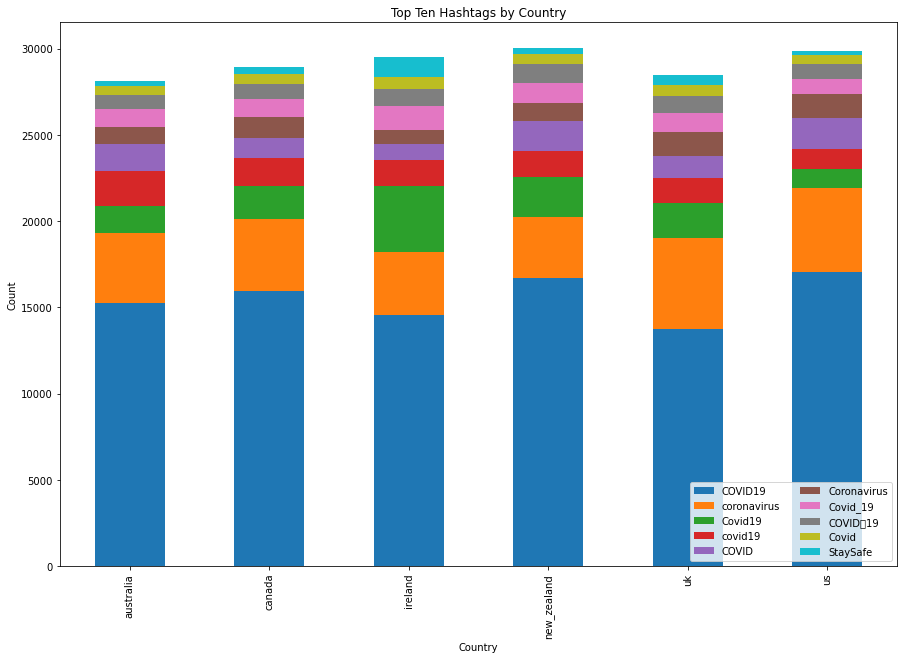

In [29]:
countryTopTenValues.plot(kind = 'bar', 
						 stacked = True,
						 figsize = (15,10))

plt.legend(loc="lower right", ncol=2)
plt.ylabel("Count")
plt.title("Top Ten Hashtags by Country")
plt.show()

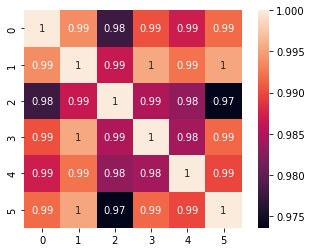

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

similarity = cosine_similarity(countryValues)

mask = np.zeros_like(similarity)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(similarity, square=True, annot=True)
plt.show()


In [7]:

from tqdm import tqdm
from bs4 import BeautifulSoup
import requests

session = requests.Session()
tqdm.pandas()

In [32]:
#expanding URLs
def expandUrls(tweet):
	urls = re.findall(r'(https?://\S+)', tweet)
	expanded = []
	for url in urls:
		try:
			expanded.append(session.head(url, allow_redirects=True, timeout=3).url)
		except:
			expanded.append(url)
	return expanded

In [33]:
expandUrls(training_df['text'][235000])

['https://paper.li/JacobTh85649736/1584426982?edition_id=5fe8a2a0-c40a-11ea-a3f9-0cc47a0d1605']

In [12]:
#expanded_urls = []                   
#for i in tqdm(range(len(training_df))):
	#expanded_urls.append(expandUrls(training_df['text'][i]))
#training_df['expanded_urls'] = expanded_urls

  0%|          | 115/240000 [00:56<32:47:32,  2.03it/s]

In [49]:
training_df['text_remove_newline'] = training_df['text'].apply(lambda x: x.replace("\n", ""))
training_df['text_demojize'] = training_df['text_remove_newline'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
training_df['remove_@'] = training_df['text_demojize'].apply(lambda x: x.replace("@", ""))
training_df['cleaned_text'] = training_df['remove_@'].apply(lambda x: re.sub(r' +', ' ', x))


In [50]:
training_df

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_remove_newline,text_demojize,remove_@,remove_colon,cleaned_text
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...,My sources WhiteHouse say 2 tactics will be us...,My sources WhiteHouse say 2 tactics will be us...,My sources WhiteHouse say 2 tactics will be us...
2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...,I'll venture a wild guess If you were running ...,I'll venture a wild guess: If you were running...
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,United_States Pandémie de #coronavirus: 30 p...,United_States Pandémie de #coronavirus: 30 p...,United_States Pandémie de #coronavirus 30 pa...,United_States Pandémie de #coronavirus: 30 pa...
...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏🔥🔥🔥#Mastеr","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire fi..."
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P..."


In [51]:
X = training_df['cleaned_text']
y = training_df['country']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [53]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english',
							ngram_range = (1,2)
							)),
  ("nb", MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.454625


In [54]:
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english',
							ngram_range = (1,2)
							)),
  ("svc", LinearSVC())
])
svc_pipeline.fit(X=X_train, y=y_train)

y_pred = svc_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4517083333333333


In [ ]:
#from sklearn.linear_model import LogisticRegression

#lr_pipeline = Pipeline([
#  ("tf-idf", TfidfVectorizer()),
#  ("lr", LogisticRegression(max_iter = 1000))
#])
#lr_pipeline.fit(X_train, y_train)

#y_pred = lr_pipeline.predict(X_test)
#print(accuracy_score(y_test, y_pred))

0.445
